In [1]:
import pandas
from biotite.sequence.phylo import upgma
from matplotlib import pyplot
from io import StringIO
from Bio import Phylo

In [2]:
data_path = "../../../data"

In [3]:
df = pandas.read_csv(f"{data_path}/final_cluster.csv")

In [4]:
df.describe()

,Right,Total
count,60.000000,60.0
mean,13.616667,14.0
std,1.328841,0.0
min,4.000000,14.0
25%,14.000000,14.0
50%,14.000000,14.0
75%,14.000000,14.0
max,14.000000,14.0


In [5]:
df.sort_values(by=" Right").head(30)

,Name,Family,Right,Total
11,pan_paniscus_ENSPPAG00000043476.png,orthologs_cytoglobin,4,14
55,mandrillus_leucophaeus_ENSMLEG00000035424.png,orthologs_neuroglobin,13,14
13,cebus_capucinus_ENSCCAG00000037088.png,orthologs_cytoglobin,13,14
56,carlito_syrichta_ENSTSYG00000026821.png,orthologs_neuroglobin,13,14
10,rhinopithecus_bieti_ENSRBIG00000040278.png,orthologs_cytoglobin,13,14
8,rhinopithecus_roxellana_ENSRROG00000038611.png,orthologs_cytoglobin,13,14
7,gorilla_gorilla_ENSGGOG00000001385.png,orthologs_cytoglobin,13,14
0,homo_sapiens_ENSG00000161544.png,orthologs_cytoglobin,13,14
5,prolemur_simus_ENSPSMG00000023947.png,orthologs_cytoglobin,13,14
4,aotus_nancymaae_ENSANAG00000037374.png,orthologs_cytoglobin,13,14


In [6]:
df[df[" Right"] == df[" Total"]].Name.size / df.Name.size

0.7666666666666667

In [7]:
with open(f"{data_path}/cluster_sim.txt") as f:
    sim_hash = eval(f.read())

In [8]:
df_all = pandas.DataFrame.from_dict(sim_hash)
df_all.columns = [c.split("/")[-3].split(".")[0].split("_")[1] +"_"+ c.split("/")[-1].split(".")[0] for c in df_all.columns]
df_all.index = [c.split("/")[-3].split(".")[0].split("_")[1] +"_"+ c.split("/")[-1].split(".")[0] for c in df_all.index]

In [9]:
fixed_df_all = df_all.sort_index()[sorted(df_all.columns)]
numpy_all = fixed_df_all.to_numpy(na_value=0)

In [10]:
tree = upgma(1-numpy_all)

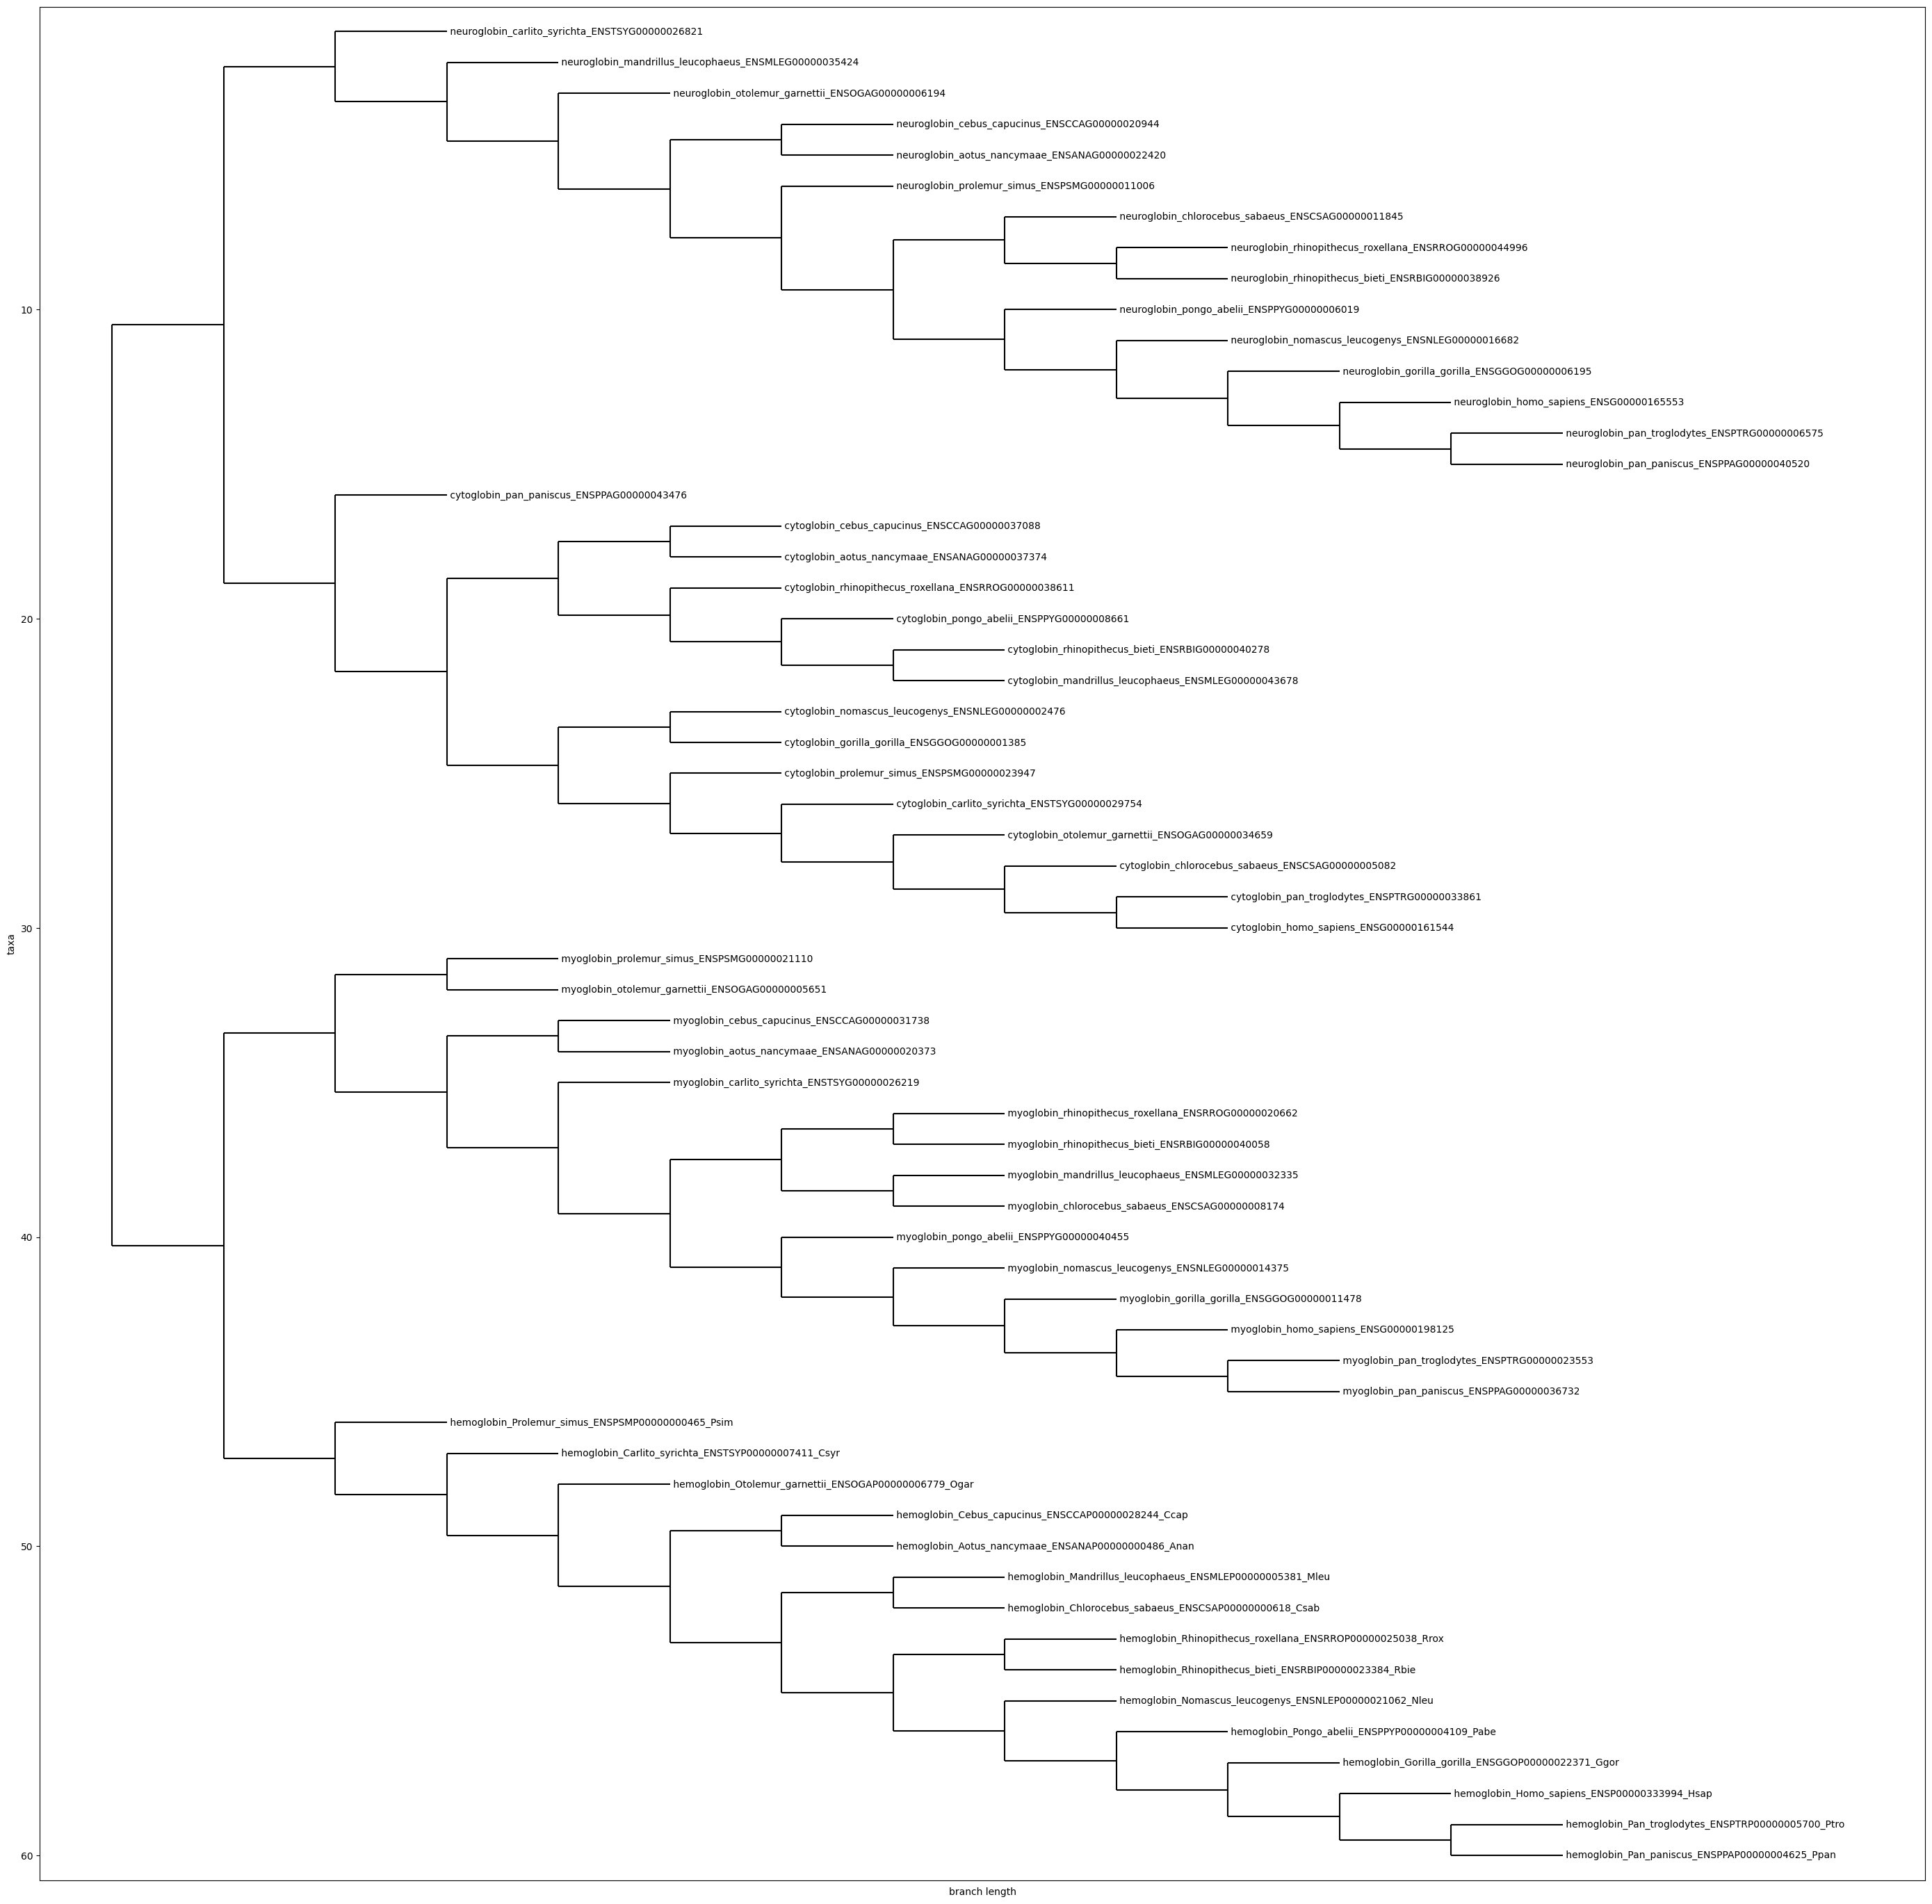

In [11]:
fig, ax = pyplot.subplots(1, 1, figsize=(35, 35))
newick = tree.to_newick(include_distance=False)
t = Phylo.read(StringIO(newick), "newick")
t.ladderize()
ax.grid(False)
ax.set_xticks([])
Phylo.draw(
    t,
    show_confidence=False,
    axes=ax,
    do_show=False,
    label_func=lambda clade: "" if not clade.name else list(fixed_df_all.columns)[int(clade.name)],
    branch_labels=lambda clade: "" if not clade.name else "{:.2f}".format(
        clade.confidence) if clade.confidence else ""
)

pyplot.show()

In [12]:
fixed_df_all.head()

,cytoglobin_aotus_nancymaae_ENSANAG00000037374,cytoglobin_carlito_syrichta_ENSTSYG00000029754,cytoglobin_cebus_capucinus_ENSCCAG00000037088,cytoglobin_chlorocebus_sabaeus_ENSCSAG00000005082,cytoglobin_gorilla_gorilla_ENSGGOG00000001385,cytoglobin_homo_sapiens_ENSG00000161544,cytoglobin_mandrillus_leucophaeus_ENSMLEG00000043678,cytoglobin_nomascus_leucogenys_ENSNLEG00000002476,cytoglobin_otolemur_garnettii_ENSOGAG00000034659,cytoglobin_pan_paniscus_ENSPPAG00000043476,...,neuroglobin_homo_sapiens_ENSG00000165553,neuroglobin_mandrillus_leucophaeus_ENSMLEG00000035424,neuroglobin_nomascus_leucogenys_ENSNLEG00000016682,neuroglobin_otolemur_garnettii_ENSOGAG00000006194,neuroglobin_pan_paniscus_ENSPPAG00000040520,neuroglobin_pan_troglodytes_ENSPTRG00000006575,neuroglobin_pongo_abelii_ENSPPYG00000006019,neuroglobin_prolemur_simus_ENSPSMG00000011006,neuroglobin_rhinopithecus_bieti_ENSRBIG00000038926,neuroglobin_rhinopithecus_roxellana_ENSRROG00000044996
cytoglobin_aotus_nancymaae_ENSANAG00000037374,NaN,0.287391,0.756407,0.499316,0.394023,0.507233,0.501379,0.402341,0.472368,0.108395,...,0.101157,0.084296,0.104051,0.104290,0.101165,0.101165,0.100471,0.117384,0.109414,0.109414
cytoglobin_carlito_syrichta_ENSTSYG00000029754,0.287391,NaN,0.257095,0.867147,0.263352,0.849834,0.275167,0.272393,0.834627,0.263552,...,0.123344,0.098456,0.124682,0.113105,0.117682,0.117682,0.119367,0.107560,0.124597,0.124597
cytoglobin_cebus_capucinus_ENSCCAG00000037088,0.756407,0.257095,NaN,0.476907,0.460014,0.493980,0.488107,0.460365,0.458065,0.089189,...,0.096357,0.096367,0.094952,0.109472,0.097184,0.097184,0.109819,0.109493,0.105659,0.105659
cytoglobin_chlorocebus_sabaeus_ENSCSAG00000005082,0.499316,0.867147,0.476907,NaN,0.512717,0.947195,0.484582,0.498240,0.848149,0.083197,...,0.116477,0.095810,0.115900,0.098618,0.112129,0.112129,0.101981,0.124505,0.115397,0.115397
cytoglobin_gorilla_gorilla_ENSGGOG00000001385,0.394023,0.263352,0.460014,0.512717,NaN,0.535161,0.424269,0.892272,0.484797,0.090622,...,0.103431,0.097992,0.103672,0.101919,0.104164,0.104164,0.098994,0.104937,0.100540,0.100540


In [13]:
k=14
by_homologues = {}
only_homologues = {}
for column in fixed_df_all.columns:
    if column.split("_")[0] in by_homologues:
        by_homologues[column.split("_")[0]] += list(fixed_df_all[column].sort_values(ascending=False).index[:k])
        only_homologues[column.split("_")[0]] += [i.split("_")[0] for i in fixed_df_all[column].sort_values(ascending=False).index[:k]]
    else:
        by_homologues[column.split("_")[0]] = list(fixed_df_all[column].sort_values(ascending=False).index[:k])
        only_homologues[column.split("_")[0]] = [i.split("_")[0] for i in fixed_df_all[column].sort_values(ascending=False).index[:k]]


In [14]:
pandas.DataFrame.from_dict(by_homologues)

,cytoglobin,hemoglobin,myoglobin,neuroglobin
0,cytoglobin_cebus_capucinus_ENSCCAG00000037088,hemoglobin_Cebus_capucinus_ENSCCAP00000028244_...,myoglobin_cebus_capucinus_ENSCCAG00000031738,neuroglobin_cebus_capucinus_ENSCCAG00000020944
1,cytoglobin_homo_sapiens_ENSG00000161544,hemoglobin_Chlorocebus_sabaeus_ENSCSAP00000000...,myoglobin_gorilla_gorilla_ENSGGOG00000011478,neuroglobin_nomascus_leucogenys_ENSNLEG0000001...
2,cytoglobin_pan_troglodytes_ENSPTRG00000033861,hemoglobin_Homo_sapiens_ENSP00000333994_Hsap,myoglobin_nomascus_leucogenys_ENSNLEG00000014375,neuroglobin_homo_sapiens_ENSG00000165553
3,cytoglobin_mandrillus_leucophaeus_ENSMLEG00000...,hemoglobin_Rhinopithecus_roxellana_ENSRROP0000...,myoglobin_chlorocebus_sabaeus_ENSCSAG00000008174,neuroglobin_pan_troglodytes_ENSPTRG00000006575
4,cytoglobin_chlorocebus_sabaeus_ENSCSAG00000005082,hemoglobin_Rhinopithecus_bieti_ENSRBIP00000023...,myoglobin_pongo_abelii_ENSPPYG00000040455,neuroglobin_pan_paniscus_ENSPPAG00000040520
...,...,...,...,...
205,cytoglobin_nomascus_leucogenys_ENSNLEG00000002476,hemoglobin_Mandrillus_leucophaeus_ENSMLEP00000...,myoglobin_prolemur_simus_ENSPSMG00000021110,neuroglobin_prolemur_simus_ENSPSMG00000011006
206,cytoglobin_otolemur_garnettii_ENSOGAG00000034659,hemoglobin_Cebus_capucinus_ENSCCAP00000028244_...,myoglobin_carlito_syrichta_ENSTSYG00000026219,neuroglobin_mandrillus_leucophaeus_ENSMLEG0000...
207,cytoglobin_prolemur_simus_ENSPSMG00000023947,hemoglobin_Carlito_syrichta_ENSTSYP00000007411...,myoglobin_cebus_capucinus_ENSCCAG00000031738,neuroglobin_aotus_nancymaae_ENSANAG00000022420
208,cytoglobin_carlito_syrichta_ENSTSYG00000029754,hemoglobin_Otolemur_garnettii_ENSOGAP000000067...,myoglobin_aotus_nancymaae_ENSANAG00000020373,neuroglobin_otolemur_garnettii_ENSOGAG00000006194


In [15]:
#Precision
for h in only_homologues:
    print(h)
    print(sum([i==h for i in only_homologues[h]])/len(only_homologues[h]))

cytoglobin
0.9
hemoglobin
1.0
myoglobin
1.0
neuroglobin
0.9904761904761905


In [16]:
fixed_df_all.describe()

,cytoglobin_aotus_nancymaae_ENSANAG00000037374,cytoglobin_carlito_syrichta_ENSTSYG00000029754,cytoglobin_cebus_capucinus_ENSCCAG00000037088,cytoglobin_chlorocebus_sabaeus_ENSCSAG00000005082,cytoglobin_gorilla_gorilla_ENSGGOG00000001385,cytoglobin_homo_sapiens_ENSG00000161544,cytoglobin_mandrillus_leucophaeus_ENSMLEG00000043678,cytoglobin_nomascus_leucogenys_ENSNLEG00000002476,cytoglobin_otolemur_garnettii_ENSOGAG00000034659,cytoglobin_pan_paniscus_ENSPPAG00000043476,...,neuroglobin_homo_sapiens_ENSG00000165553,neuroglobin_mandrillus_leucophaeus_ENSMLEG00000035424,neuroglobin_nomascus_leucogenys_ENSNLEG00000016682,neuroglobin_otolemur_garnettii_ENSOGAG00000006194,neuroglobin_pan_paniscus_ENSPPAG00000040520,neuroglobin_pan_troglodytes_ENSPTRG00000006575,neuroglobin_pongo_abelii_ENSPPYG00000006019,neuroglobin_prolemur_simus_ENSPSMG00000011006,neuroglobin_rhinopithecus_bieti_ENSRBIG00000038926,neuroglobin_rhinopithecus_roxellana_ENSRROG00000044996
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,...,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,0.180266,0.184581,0.178918,0.221606,0.186767,0.222874,0.181912,0.182119,0.206881,0.107289,...,0.277241,0.250630,0.276591,0.251787,0.275255,0.275255,0.267681,0.261456,0.272052,0.272052
std,0.166077,0.192644,0.167416,0.233214,0.170257,0.236916,0.168102,0.166440,0.218365,0.045496,...,0.346421,0.284537,0.345109,0.297176,0.344985,0.344985,0.331988,0.315871,0.339678,0.339678
min,0.075088,0.089151,0.073203,0.083197,0.086494,0.082632,0.078117,0.084766,0.082937,0.072214,...,0.069985,0.084296,0.070054,0.064636,0.068997,0.068997,0.070065,0.063735,0.066776,0.066776
25%,0.086787,0.099220,0.084003,0.104131,0.099867,0.103991,0.091494,0.096950,0.095274,0.090075,...,0.078895,0.097041,0.078301,0.083236,0.077682,0.077682,0.078030,0.074401,0.074915,0.074915
50%,0.104051,0.105447,0.102055,0.110441,0.105079,0.110274,0.102247,0.104110,0.101537,0.101105,...,0.098300,0.105154,0.097261,0.099245,0.098529,0.098529,0.095734,0.097659,0.093756,0.093756
75%,0.116763,0.124639,0.117447,0.125070,0.125569,0.125593,0.133522,0.120985,0.124703,0.107846,...,0.122700,0.118206,0.125784,0.112499,0.119872,0.119872,0.119142,0.134438,0.125789,0.125789
max,0.756407,0.867147,0.756407,0.947195,0.892272,0.995028,0.801722,0.892272,0.869047,0.394031,...,0.991968,0.841455,0.984172,0.847520,1.000000,1.000000,0.941468,0.873243,1.000000,1.000000
